In [2]:
import numpy as np 
import pandas as pd 
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

## Importing Dataset 
    1.Dataset have Seprate train and test Data
    2.Dataset is in Excel File
    3.Load Dataset with the help of pandas function read_excel()  

In [5]:
df_train=pd.read_excel('Data_Train.xlsx')
df_test=pd.read_excel('Test_set.xlsx')
pd.set_option('display.max_columns', None)

In [6]:
#Overview OF data
df_train.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## DROP NULL VALUES

In [8]:
df_train.dropna(inplace=True)

In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 1001.4+ KB


In [10]:
df_train['Duration'].value_counts()

2h 50m     550
1h 30m     386
2h 55m     337
2h 45m     337
2h 35m     329
          ... 
35h 20m      1
29h 40m      1
13h 35m      1
32h 20m      1
42h 5m       1
Name: Duration, Length: 368, dtype: int64

## Data Preprocessing

In [11]:
df_train['Journey_day'] = pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.day

In [12]:
df_train['Journey_month'] = pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.month

In [13]:
df_train['Journey_year'] = pd.to_datetime(df_train.Date_of_Journey,format="%d/%m/%Y").dt.year

In [14]:
df_train.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year'],
      dtype='object')

**FROM DATE WE CONVERTED TO DATETIME AND EXTRACTED DATE , MONTH AND YEAR SEPARATELY AND CRETATED NEW COLUMNS AS WE CAN SEE ABOVE**

In [15]:
df_train.drop(['Date_of_Journey'],axis=1,inplace=True)

In [16]:
df_train['Dep_Hour']=pd.to_datetime(df_train.Dep_Time).dt.hour

In [17]:
df_train['Dep_Minute']=pd.to_datetime(df_train.Dep_Time).dt.minute

In [18]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Dep_Time', 'Arrival_Time',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Journey_day',
       'Journey_month', 'Journey_year', 'Dep_Hour', 'Dep_Minute'],
      dtype='object')

In [19]:
df_train.drop(['Dep_Time'],axis=1,inplace=True)

In [20]:
df_train.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,2019,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,2019,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,2019,16,50


In [21]:
df_train["Arrival_hour"] = pd.to_datetime(df_train.Arrival_Time).dt.hour

In [22]:
df_train["Arrival_minute"] = pd.to_datetime(df_train.Arrival_Time).dt.minute

In [23]:
df_train.drop(['Arrival_Time'],axis=1,inplace=True)

In [24]:
"2h 30m".split()

['2h', '30m']

In [25]:
int("2h 30m".split(sep = "h")[0])

2

In [26]:
int("2h 30m".split(sep = "m")[0].split()[-1])

30

In [27]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_train["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [28]:
df_train['Duration_Hour']=duration_hours
df_train['Duration_Minute']=duration_mins

In [29]:
df_train.columns

Index(['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Journey_day', 'Journey_month',
       'Journey_year', 'Dep_Hour', 'Dep_Minute', 'Arrival_hour',
       'Arrival_minute', 'Duration_Hour', 'Duration_Minute'],
      dtype='object')

In [30]:
df_train.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


In [31]:
df_train.drop(['Duration'],axis=1,inplace=True)

In [32]:
df_train.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey_day,Journey_month,Journey_year,Dep_Hour,Dep_Minute,Arrival_hour,Arrival_minute,Duration_Hour,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,2019,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,2019,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,2019,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,2019,16,50,21,35,4,45


## HANDLING CATEGORICAL FEATURE
    In statistics, a categorical variable is a variable that can take on one of a limited, and usually fixed,number of possible values, assigning each individual or other unit of observation to a particular group or  nominal   category on the basis of some qualitative property. 
    
    1.AIRLINE
    2.SOURCE
    3.DESTINATION
    4.ROUTE
    5.TOTAL_STOP
    
    These are categorical Features in This DAta set
    
    AS DATA IS **NOMINAL** SO USE OneHotEncoding

In [33]:
df_train['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [34]:
df_train['Source'].value_counts()

Delhi       4536
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [35]:
df_train['Destination'].value_counts()

Cochin       4536
Banglore     2871
Delhi        1265
New Delhi     932
Hyderabad     697
Kolkata       381
Name: Destination, dtype: int64

In [36]:
df_train['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [37]:
#AS in adsitional info there is more than 78% row don't have any info so it's better to drop it
df_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [38]:
df_train.drop(['Additional_Info'],axis=1,inplace=True)

In [39]:
#Route can be same as number of Stops so we can drop it
df_train.drop(['Route'],axis=1,inplace=True)

In [40]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
df_train = pd.get_dummies(data=df_train, columns=['Airline', 'Source','Destination'],drop_first=True)

In [41]:
df_train.shape

(10682, 31)

In [42]:
df_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

In [45]:

df_train['Total_Stops']

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

In [65]:
#Drop Airline,Source,Destination
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

KeyError: "['Airline' 'Source' 'Destination'] not found in axis"

In [68]:
df_train.shape

(10682, 30)

In [69]:
df_train.drop(['Journey_year'],axis=1,inplace=True)

KeyError: "['Journey_year'] not found in axis"

## TEST DATASET

In [51]:
#Overview OF data
df_test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [52]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2671 entries, 0 to 2670
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          2671 non-null   object
 1   Date_of_Journey  2671 non-null   object
 2   Source           2671 non-null   object
 3   Destination      2671 non-null   object
 4   Route            2671 non-null   object
 5   Dep_Time         2671 non-null   object
 6   Arrival_Time     2671 non-null   object
 7   Duration         2671 non-null   object
 8   Total_Stops      2671 non-null   object
 9   Additional_Info  2671 non-null   object
dtypes: object(10)
memory usage: 208.8+ KB


In [53]:
df_test.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [54]:
# Date_of_Journey
df_test["Journey_day"] = pd.to_datetime(df_test.Date_of_Journey, format="%d/%m/%Y").dt.day
df_test["Journey_month"] = pd.to_datetime(df_test.Date_of_Journey, format = "%d/%m/%Y").dt.month
df_test.drop(["Date_of_Journey"], axis = 1, inplace = True)

In [57]:
# Dep_Time
df_test["Dep_Hour"] = pd.to_datetime(df_test.Dep_Time).dt.hour
df_test["Dep_Minute"] = pd.to_datetime(df_test.Dep_Time).dt.minute
df_test.drop(["Dep_Time"], axis = 1, inplace = True)

In [58]:
df_test["Arrival_hour"] = pd.to_datetime(df_test.Arrival_Time).dt.hour
df_test["Arrival_minute"] = pd.to_datetime(df_test.Arrival_Time).dt.minute
df_test.drop(['Arrival_Time'],axis=1,inplace=True)

In [59]:
# Time taken by plane to reach destination is called Duration
# It is the differnce betwwen Departure Time and Arrival time


# Assigning and converting Duration column into list
duration = list(df_test["Duration"])

for i in range(len(duration)):
    if len(duration[i].split()) != 2:    # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

In [60]:
df_test['Duration_Hour']=duration_hours
df_test['Duration_Minute']=duration_mins

In [62]:
df_test.drop(['Additional_Info'],axis=1,inplace=True)
df_test.drop(['Route'],axis=1,inplace=True)

In [63]:
# --- Data Preprocessing ---
# Converting categorical features using OneHotEncoding method
df_test = pd.get_dummies(data=df_test, columns=['Airline', 'Source','Destination'],drop_first=True)

In [64]:
df_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4},inplace=True)

In [66]:
#Drop Airline,Source,Destination
df_train.drop(["Airline", "Source", "Destination"], axis = 1, inplace = True)

KeyError: "['Airline' 'Source' 'Destination'] not found in axis"

In [67]:
df_test.shape

(2671, 29)

In [73]:
df_train.columns

Index(['Total_Stops', 'Price', 'Journey_day', 'Journey_month', 'Dep_Hour',
       'Dep_Minute', 'Arrival_hour', 'Arrival_minute', 'Duration_Hour',
       'Duration_Minute', 'Airline_Air India', 'Airline_GoAir',
       'Airline_IndiGo', 'Airline_Jet Airways', 'Airline_Jet Airways Business',
       'Airline_Multiple carriers',
       'Airline_Multiple carriers Premium economy', 'Airline_SpiceJet',
       'Airline_Trujet', 'Airline_Vistara', 'Airline_Vistara Premium economy',
       'Source_Chennai', 'Source_Delhi', 'Source_Kolkata', 'Source_Mumbai',
       'Destination_Cochin', 'Destination_Delhi', 'Destination_Hyderabad',
       'Destination_Kolkata', 'Destination_New Delhi'],
      dtype='object')

In [74]:
X_train=df_train.drop(['Price'],axis=1)

In [75]:
y_train=df_train['Price']

## ExtraTreesRegressor 
    It is use to check the which Feature is important to decide the Price(Dependent Feature)
    

In [81]:
from sklearn.ensemble import ExtraTreesRegressor
imp_feature = ExtraTreesRegressor()
imp_feature.fit(X_train, y_train)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

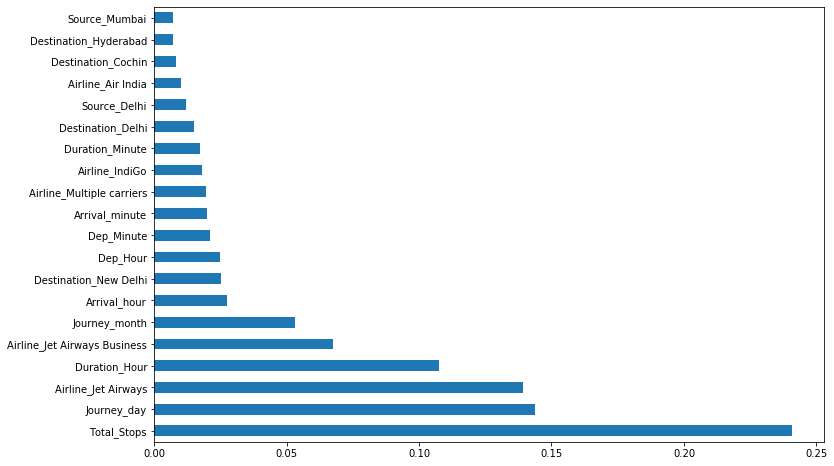

In [82]:
#plot graph of feature importances for better visualization

plt.figure(figsize = (12,8))
feat_importances = pd.Series(imp_feature.feature_importances_, index=X_train.columns)
feat_importances.nlargest(20).plot(kind='barh')
plt.show()

**AS SEEN ABOVE TOTAL_STOPS IS VERY IMPortant FEATURE **
  YOU can you this SETP Before Regression  

## MODEL TEST

In [78]:
from sklearn.model_selection import train_test_split
X_Train, X_test, y_Train, y_test = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)

In [121]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor

#model = LinearRegression()

model = RandomForestRegressor()
#model = DecisionTreeRegressor()
model.fit(X_Train, y_Train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [122]:
y_pred=model.predict(X_test)

In [123]:
y_pred

array([16918.26      ,  5670.69      ,  8862.52      , ...,
        6604.57      , 12497.92583333, 13054.32366667])

In [124]:
model.score(X_test, y_test)

0.7948292290327781

In [125]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 1182.7309553396353
MSE: 4423903.719666937
RMSE: 2103.3078043089504


## Linear Regression
    MAE: 1972.9372855148056
    MSE: 8202327.557407134
    RMSE: 2863.9705929717807
## DecisionTreeRegressor
     MAE: 1315.8184760567772
     MSE: 5750485.6475678515
     RMSE: 2398.0170240362872
## RandomForestRegressor
     MAE: 1182.7309553396353
     MSE: 4423903.719666937
     RMSE: 2103.3078043089504
     

## Save Model in Pickle and reuse it


In [126]:
import pickle
# open a file, where you ant to store the data
file = open('model.pkl', 'wb')

# dump information to that file
pickle.dump(model, file)

In [ ]:
model1 = open('flight_price_rf.pkl','rb')
forest = pickle.load(model)

In [131]:
import joblib
file1=open('model1.joblib','wb')
joblib.dump(model,file1)

TypeError: cannot serialize '_io.BufferedReader' object